## 导入库

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 读取数据

In [ ]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/testA.csv')
submit = pd.read_csv('../data/sample_submit.csv')

## 查看数据sample

In [ ]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [ ]:
test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,...,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,...,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,...,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,...,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,...,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [ ]:
submit.head()

,id,isDefault
0,800000,0.5
1,800001,0.5
2,800002,0.5
3,800003,0.5
4,800004,0.5


## 数据维度

In [ ]:
train.shape

(800000, 47)

In [ ]:
test.shape

(200000, 46)

### 特征名

In [ ]:
train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

isDefault是标签，其他为特征

## 数据类型

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

- 较多特征存在缺失值;
- 特征的数据类型多样化。

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  float64
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  float64
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  float64
 15  regionCode          200000 non-nul

测试数据亦然

## 数据的统计特征

In [ ]:
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [ ]:
test.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,purpose,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,...,189889.000000,189889.000000,189889.000000,189889.000000,189889.000000,191606.000000,182425.000000,189889.000000,189889.000000,189889.000000
mean,899999.500000,14436.954125,3.481690,13.244800,438.737804,72435.750740,0.614100,7.645184e+04,1.010430,1.744410,...,8.093976,8.527334,8.274840,14.592551,5.596296,11.626891,0.000833,0.003618,0.088341,2.180316
std,57735.171256,8737.430326,0.855195,4.766528,262.246698,106892.374933,0.675465,7.766237e+04,0.781732,2.367497,...,4.803759,7.303106,4.550902,8.109357,3.220978,5.464619,0.030516,0.064276,0.505161,1.841987
min,800000.000000,500.000000,3.000000,5.310000,14.010000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,849999.750000,8000.000000,3.000000,9.750000,248.890000,420.000000,0.000000,4.600000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,899999.500000,12000.000000,3.000000,12.740000,375.430000,7836.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,949999.250000,20000.000000,3.000000,15.990000,580.942500,119739.250000,1.000000,9.000000e+04,2.000000,4.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,378338.000000,5.000000,9.500000e+06,2.000000,13.000000,...,70.000000,99.000000,83.000000,112.000000,41.000000,90.000000,3.000000,3.000000,25.000000,28.000000


## 查看数据头尾变化

In [ ]:
# 设置显示的行数和列数
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列
pd.concat([train.head(3), train.tail(3)])

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,65000.0,2,2015-10-01,1,0,47.0,17,12.11,1.0,670.0,674.0,5.0,0.0,0.0,6381.0,51.9,36.0,1,0,Jul-2002,0.0,1.0,2.0,1.0,4.0,4.0,1.0,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,96000.0,2,2015-02-01,0,4,34.0,18,29.25,0.0,675.0,679.0,16.0,0.0,0.0,69702.0,61.3,37.0,1,0,Jan-1994,4.0,1.0,0.0,5.0,8.0,8.0,7.0,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,120000.0,0,2018-08-01,0,4,62.0,13,8.99,0.0,695.0,699.0,7.0,0.0,0.0,8420.0,72.6,13.0,0,0,Feb-2002,4.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


## 数据缺失值和唯一值

### 缺失值分析

#### 查看每个特征的缺失情况

In [ ]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


employmentTitle       0.000001
postCode              0.000001
title                 0.000001
dti                   0.000299
pubRecBankruptcies    0.000506
revolUtil             0.000664
n10                   0.041549
n4                    0.041549
n12                   0.050338
n9                    0.050338
n7                    0.050338
n6                    0.050338
n3                    0.050338
n13                   0.050338
n2                    0.050338
n1                    0.050338
n0                    0.050338
n5                    0.050338
n14                   0.050338
n8                    0.050339
employmentLength      0.058499
n11                   0.087190
dtype: float64


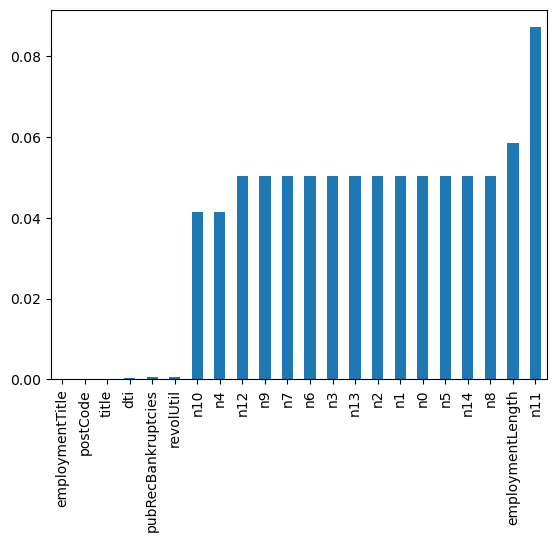

In [ ]:
# nan可视化
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
print(missing)

可以看出46个特征（不包括isDefault）中有22个特征存在缺失值

#### 查看每个样本的特征缺失情况

In [ ]:
missing_feas_count = train.isnull().sum(axis=1)
missing_feas_count.head()

0     0
1    13
2     0
3     0
4     1
dtype: int64

In [ ]:
feas_cnt = train.shape[1] - 1
feas_cnt

46

输出特征缺失数超过特征总数1/3的样本id

In [ ]:
samples_with_too_many_missing = missing_feas_count[missing_feas_count > feas_cnt / 3]
samples_with_too_many_missing.count()

1421

### 唯一值分析

查看训练集测试集中特征属性只有一值的特征。如果一个特征的唯一值个数<=1，说明此特征仅有一值，对于模型性能可能没有帮助，而且可能会带来一些不必要的问题，通常建议在数据预处理阶段剔除这样的特征


In [ ]:
one_value_fea = [col for col in train.columns if train[col].nunique() <= 1]
one_value_fea

['policyCode']

In [ ]:
one_value_fea_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_fea_test

['policyCode']